<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Mathematical Tools

Dr. Yves J. Hilpisch

The Python Quants GmbH

<a href='http://fpq.io'>http://fpq.io</a> | <a href='mailto:team@tpq.io'>team@tpq.io</a>

## Approximation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [2]:
def f(x):
    return np.sin(x) + 0.5 * x

In [3]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 50)

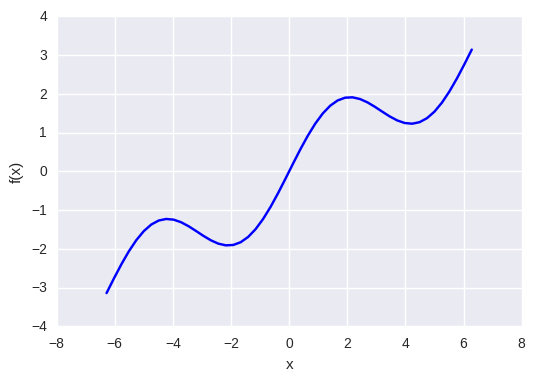

In [4]:
plt.plot(x, f(x), 'b')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

### Regression

#### Monomials as Basis Functions

In [5]:
reg = np.polyfit(x, f(x), deg=1)
ry = np.polyval(reg, x)

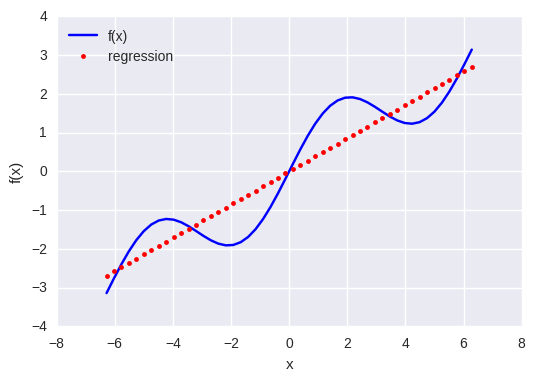

In [6]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [7]:
reg = np.polyfit(x, f(x), deg=5)
ry = np.polyval(reg, x)

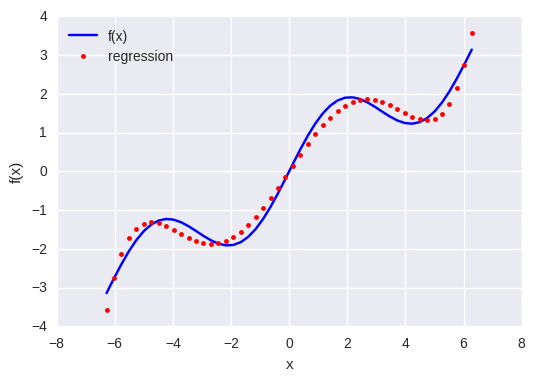

In [8]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [9]:
reg = np.polyfit(x, f(x), 7)
ry = np.polyval(reg, x)

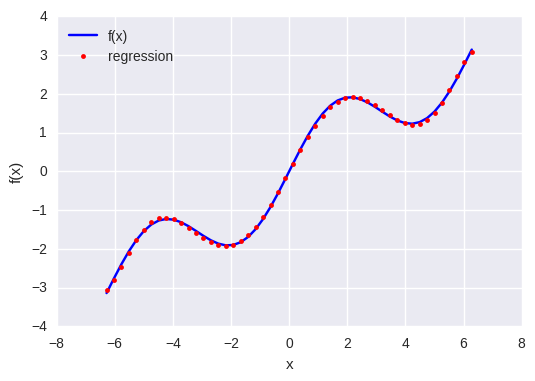

In [10]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [11]:
np.allclose(f(x), ry)

False

In [12]:
np.sum((f(x) - ry) ** 2) / len(x)

0.0017769134759517816

#### Individual Basis Functions

In [13]:
matrix = np.zeros((3 + 1, len(x)))
matrix[3, :] = x ** 3
matrix[2, :] = x ** 2
matrix[1, :] = x
matrix[0, :] = 1

In [14]:
reg = np.linalg.lstsq(matrix.T, f(x))[0]

In [15]:
reg

array([  1.13340410e-14,   5.62777448e-01,  -8.88178420e-16,
        -5.43553615e-03])

In [16]:
ry = np.dot(reg, matrix)

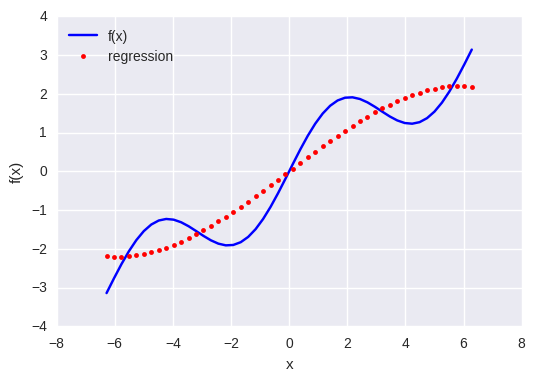

In [17]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [18]:
matrix[3, :] = np.sin(x)
reg = np.linalg.lstsq(matrix.T, f(x))[0]
ry = np.dot(reg, matrix)

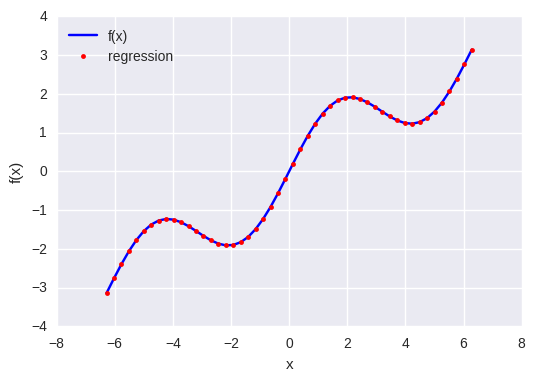

In [19]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [20]:
np.allclose(f(x), ry)

True

In [21]:
np.sum((f(x) - ry) ** 2) / len(x)

2.1781497299041883e-31

In [22]:
reg

array([  9.26243218e-17,   5.00000000e-01,   0.00000000e+00,
         1.00000000e+00])

#### Noisy Data

In [23]:
xn = np.linspace(-2 * np.pi, 2 * np.pi, 50)
xn = xn + 0.15 * np.random.standard_normal(len(xn))
yn = f(xn) + 0.25 * np.random.standard_normal(len(xn))

In [24]:
reg = np.polyfit(xn, yn, 7)
ry = np.polyval(reg, xn)

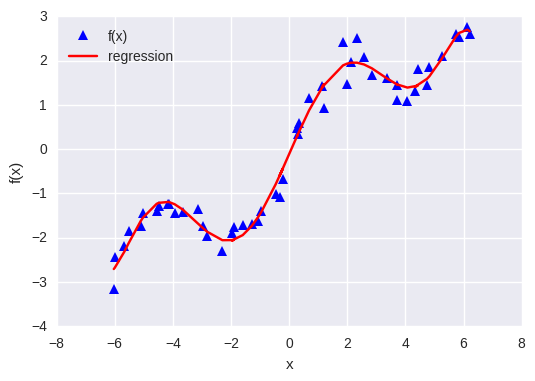

In [25]:
plt.plot(xn, yn, 'b^', label='f(x)')
plt.plot(xn, ry, 'r', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

#### Unsorted Data

In [26]:
xu = np.random.rand(50) * 4 * np.pi - 2 * np.pi
yu = f(xu)

In [28]:
print(xu[:10].round(2))
print(yu[:10].round(2))

[ 1.91 -4.51  5.18  3.25  0.4  -2.82 -0.62 -3.67 -0.99  4.23]
[ 1.9  -1.27  1.69  1.52  0.59 -1.73 -0.89 -1.33 -1.33  1.23]


In [29]:
reg = np.polyfit(xu, yu, 5)
ry = np.polyval(reg, xu)

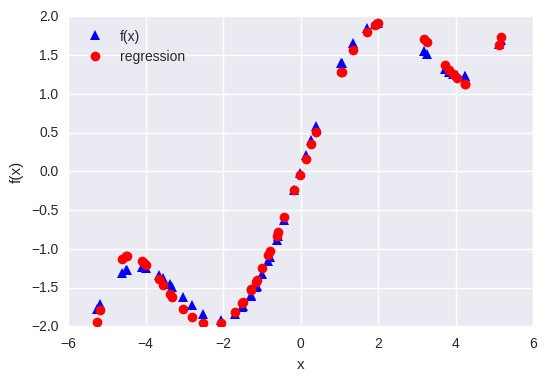

In [30]:
plt.plot(xu, yu, 'b^', label='f(x)')
plt.plot(xu, ry, 'ro', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

#### Multiple Dimensions

In [32]:
def fm(x, y):
    return np.sin(x) + 0.25 * x + np.sqrt(y) + 0.05 * y ** 2

In [34]:
x = np.linspace(0, 10, 20)
y = np.linspace(0, 10, 20)
X, Y = np.meshgrid(x, y)
  # generates 2-d grids out of the 1-d arrays
Z = fm(X, Y)
x = X.flatten()
y = Y.flatten()
  # yields 1-d arrays from the 2-d grids

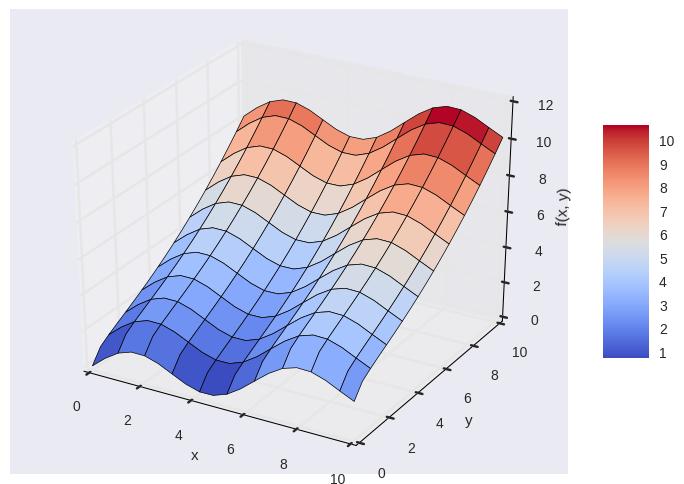

In [35]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

fig = plt.figure(figsize=(9, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap=mpl.cm.coolwarm,
        linewidth=0.5, antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)

In [36]:
matrix = np.zeros((len(x), 6 + 1))
matrix[:, 6] = y ** 3 # np.sqrt(y)
matrix[:, 5] = np.sin(x)
matrix[:, 4] = y ** 2
matrix[:, 3] = x ** 2
matrix[:, 2] = y
matrix[:, 1] = x
matrix[:, 0] = 1

In [37]:
import statsmodels.api as sm

In [39]:
model = sm.OLS(fm(x, y), matrix).fit()

In [40]:
model.rsquared

0.99910569961971096

In [41]:
a = model.params
a

array([  2.18562753e-01,   2.50000000e-01,   7.32998257e-01,
        -3.66026653e-16,  -3.50690587e-02,   1.00000000e+00,
         4.18509933e-03])

In [43]:
def reg_func(a, x, y):
    f6 = a[6] * y ** 3 # np.sqrt(y)
    f5 = a[5] * np.sin(x)
    f4 = a[4] * y ** 2
    f3 = a[3] * x ** 2
    f2 = a[2] * y
    f1 = a[1] * x
    f0 = a[0] * 1
    return (f6 + f5 + f4 + f3 +
            f2 + f1 + f0)

In [45]:
RZ = reg_func(a, X, Y)

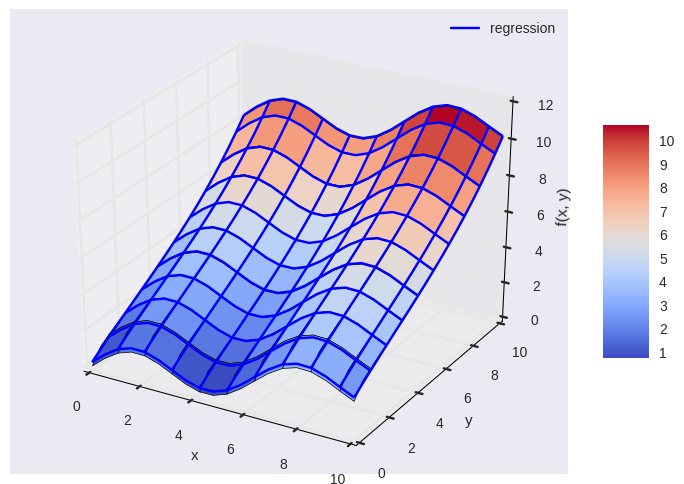

In [46]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca(projection='3d')
surf1 = ax.plot_surface(X, Y, Z, rstride=2, cstride=2,
            cmap=mpl.cm.coolwarm, linewidth=0.5,
            antialiased=True)
surf2 = ax.plot_wireframe(X, Y, RZ, rstride=2, cstride=2,
                          label='regression')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.legend()
fig.colorbar(surf, shrink=0.5, aspect=5)

### Interpolation

In [47]:
import scipy.interpolate as spi

In [48]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 25)

In [49]:
def f(x):
    return np.sin(x) + 0.5 * x

In [50]:
ipo = spi.splrep(x, f(x), k=1)

In [51]:
iy = spi.splev(x, ipo)

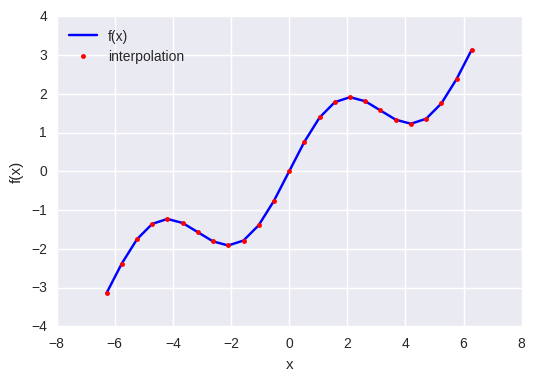

In [52]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, iy, 'r.', label='interpolation')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [53]:
np.allclose(f(x), iy)

True

In [54]:
xd = np.linspace(1.0, 3.0, 50)
iyd = spi.splev(xd, ipo)

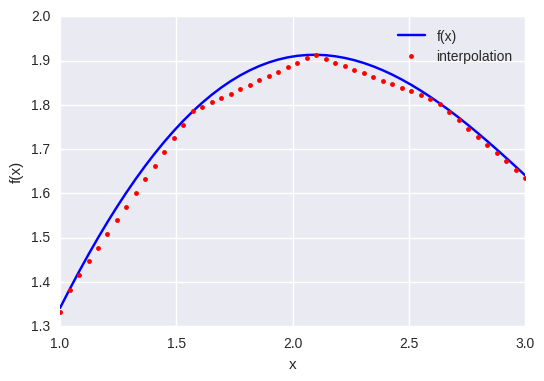

In [55]:
plt.plot(xd, f(xd), 'b', label='f(x)')
plt.plot(xd, iyd, 'r.', label='interpolation')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [56]:
ipo = spi.splrep(x, f(x), k=3)
iyd = spi.splev(xd, ipo)

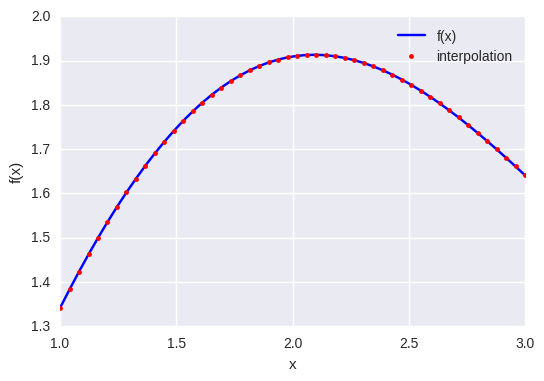

In [57]:
plt.plot(xd, f(xd), 'b', label='f(x)')
plt.plot(xd, iyd, 'r.', label='interpolation')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [58]:
np.allclose(f(xd), iyd)

False

In [59]:
np.sum((f(xd) - iyd) ** 2) / len(xd)

1.1349319851436252e-08

## Convex Optimization

In [61]:
def fm(x, y):
    return (np.sin(x) + 0.05 * x ** 2
          + np.sin(y) + 0.05 * y ** 2)

In [63]:
x = np.linspace(-10, 10, 50)
y = np.linspace(-10, 10, 50)
X, Y = np.meshgrid(x, y)
Z = fm(X, Y)

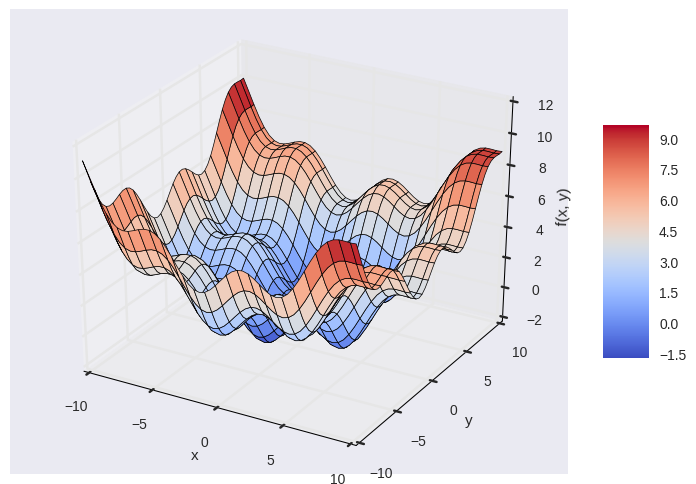

In [64]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap=mpl.cm.coolwarm,
        linewidth=0.5, antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)

In [65]:
import scipy.optimize as spo

### Global Optimization

In [70]:
def fo(x, y):
    z = np.sin(x) + 0.05 * x ** 2 + np.sin(y) + 0.05 * y ** 2
    if output == True:
        print('%8.4f %8.4f %8.4f' % (x, y, z))
    return z

In [72]:
output = True
spo.brute(fo, (-10, 10.1, 5), (-10, 10.1, 5), finish=None)

TypeError: object of type 'int' has no len()

In [73]:
output = False
opt1 = spo.brute(fo, ((-10, 10.1, 0.1), (-10, 10.1, 0.1)), finish=None)
opt1

TypeError: fo() missing 1 required positional argument: 'y'

In [ ]:
fm(opt1)

### Local Optimization

In [ ]:
output = True
opt2 = spo.fmin(fo, opt1, xtol=0.001, ftol=0.001, maxiter=15, maxfun=20)
opt2

In [ ]:
fm(opt2)

In [ ]:
output = False
spo.fmin(fo, (2.0, 2.0), maxiter=250)

### Constrained Optimization

In [ ]:
# function to be minimized
from math import sqrt
def Eu((s, b)):
    return -(0.5 * sqrt(s * 15 + b * 5) + 0.5 * sqrt(s * 5 + b * 12))

# constraints
cons = ({'type': 'ineq', 'fun': lambda (s, b):  100 - s * 10 - b * 10})
  # budget constraint
bnds = ((0, 1000), (0, 1000))  # uppper bounds large enough

In [ ]:
spo.minimize?

In [ ]:
result = spo.minimize(Eu, [5, 5], method='SLSQP',
                       bounds=bnds, constraints=cons)

In [ ]:
result

In [ ]:
result['x']

In [ ]:
-result['fun']

In [ ]:
np.dot(result['x'], [10, 10])

## Integration

In [ ]:
import scipy.integrate as sci

In [ ]:
def f(x):
    return np.sin(x) + 0.5 * x

In [ ]:
a = 0.5  # left integral limit
b = 9.5  # right integral limit
x = np.linspace(0, 10)
y = f(x)

In [ ]:
from matplotlib.patches import Polygon

fig, ax = plt.subplots(figsize=(7, 5))
plt.plot(x, y, 'b', linewidth=2)
plt.ylim(ymin=0)

# area under the function
# between lower and upper limit
Ix = np.linspace(a, b)
Iy = f(Ix)
verts = [(a, 0)] + list(zip(Ix, Iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='0.7', edgecolor='0.5')
ax.add_patch(poly)

# labels
plt.text(0.75 * (a + b), 1.5, r"$\int_a^b f(x)dx$",
         horizontalalignment='center', fontsize=20)

plt.figtext(0.9, 0.075, '$x$')
plt.figtext(0.075, 0.9, '$f(x)$')

ax.set_xticks((a, b))
ax.set_xticklabels(('$a$', '$b$'))
ax.set_yticks([f(a), f(b)])

### Numerical Integration

In [ ]:
sci.fixed_quad(f, a, b)[0]

In [ ]:
sci.quad(f, a, b)[0]

In [ ]:
sci.romberg(f, a, b)

In [ ]:
xi = np.linspace(0.5, 9.5, 75)

In [ ]:
sci.trapz(f(xi), xi)

In [ ]:
sci.simps(f(xi), xi)

### Integration by Simulation

In [ ]:
for i in range(1, 20):
    np.random.seed(1000)
    x = np.random.random(i * 10) * (b - a) + a
    print np.sum(f(x)) / len(x) * (b - a)

## Symbolic Computation

In [ ]:
import sympy as sy

### Basics

In [ ]:
x = sy.Symbol('x')
y = sy.Symbol('y')

In [ ]:
type(x)

In [ ]:
sy.sqrt(x)

In [ ]:
3 + sy.sqrt(x) - 4 ** 2

In [ ]:
f = x ** 2 + 3 + 0.5 * x ** 2 + 3 / 2

In [ ]:
sy.simplify(f)

In [ ]:
sy.init_printing(pretty_print=False, use_unicode=False)

In [ ]:
print sy.pretty(f)

In [ ]:
print sy.pretty(sy.sqrt(x) + 0.5)

In [ ]:
%%time
pi_str = str(sy.N(sy.pi, 400000))

In [ ]:
pi_str[:40]

In [ ]:
pi_str[-40:]

In [ ]:
pi_str.find('111272')

### Equations

In [ ]:
sy.solve(x ** 2 - 1)

In [ ]:
sy.solve(x ** 2 - 1 - 3)

In [ ]:
sy.solve(x ** 3 + 0.5 * x ** 2 - 1)

In [ ]:
sy.solve(x ** 2 + y ** 2)

### Integration

In [ ]:
a, b = sy.symbols('a b')

In [ ]:
print sy.pretty(sy.Integral(sy.sin(x) + 0.5 * x, (x, a, b)))

In [ ]:
int_func = sy.integrate(sy.sin(x) + 0.5 * x, x)

In [ ]:
print sy.pretty(int_func)

In [ ]:
Fb = int_func.subs(x, 9.5).evalf()
Fa = int_func.subs(x, 0.5).evalf()

In [ ]:
Fb - Fa  # exact value of integral

In [ ]:
int_func_limits = sy.integrate(sy.sin(x) + 0.5 * x, (x, a, b))
print sy.pretty(int_func_limits)

In [ ]:
int_func_limits.subs({a : 0.5, b : 9.5}).evalf()

In [ ]:
sy.integrate(sy.sin(x) + 0.5 * x, (x, 0.5, 9.5))

### Differentiation

In [ ]:
int_func.diff()

In [ ]:
f = (sy.sin(x) + 0.05 * x ** 2
   + sy.sin(y) + 0.05 * y ** 2)

In [ ]:
f

In [ ]:
del_x = sy.diff(f, x)
del_x

In [ ]:
del_y = sy.diff(f, y)
del_y

In [ ]:
xo = sy.nsolve(del_x, -1.5)
xo

In [ ]:
yo = sy.nsolve(del_y, -1.5)
yo

In [ ]:
f.subs({x : xo, y : yo}).evalf() 
  # global minimum

In [ ]:
xo = sy.nsolve(del_x, 1.5)
xo

In [ ]:
yo = sy.nsolve(del_y, 1.5)
yo

In [ ]:
f.subs({x : xo, y : yo}).evalf()
  # local optimum

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:team@tpq.io">team@tpq.io</a>

**Python Quant Platform** |
<a href="http://quant-platform.com">http://quant-platform.com</a>

**Python for Finance** |
<a href="http://python-for-finance.com" target="_blank">Python for Finance @ O'Reilly</a>

**Derivatives Analytics with Python** |
<a href="http://derivatives-analytics-with-python.com" target="_blank">Derivatives Analytics @ Wiley Finance</a>

**Listed Volatility and Variance Derivatives** |
<a href="http://lvvd.tpq.io" target="_blank">Listed VV Derivatives @ Wiley Finance</a>